In [1]:
import torch as ch
import numpy as np
# import matplotlib
from fromscratchtoml.models import svm
from fromscratchtoml.toolbox.random import Distribution
from fromscratchtoml.toolbox import binary_visualize

%matplotlib inline

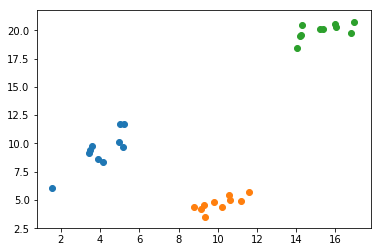

In [2]:
X1 = Distribution.linear(pts=10,
               mean=[5, 10],
               covr=[[1.5, 1], [1, 1.5]])
X2 = Distribution.linear(pts=10,
               mean=[10, 5],
               covr=[[1.5, 1], [1, 1.5]])
X3 = Distribution.linear(pts=10,
               mean=[15, 20],
               covr=[[1.5, 1], [1, 1.5]])

Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X2.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

X = ch.stack([X1, X2, X3])

binary_visualize(X)

## Creating non linear data from a bunch of linear data points.

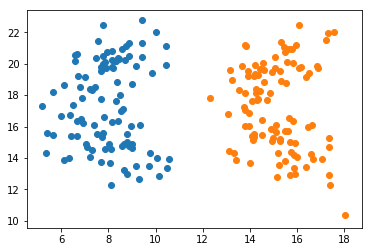

In [3]:
X1 = Distribution.linear(pts=50,
               mean=[8, 20],
               covr=[[1.5, 1], [1, 2]])
X2 = Distribution.linear(pts=50,
               mean=[8, 15],
               covr=[[1.5, -1], [-1, 2]])

X3 = Distribution.linear(pts=50,
               mean=[15, 20],
               covr=[[1.5, 1], [1, 2]])
X4 = Distribution.linear(pts=50,
               mean=[15, 15],
               covr=[[1.5, -1], [-1, 2]])

X1 = ch.cat((X1, X2))
X2 = ch.cat((X3, X4))

Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X2.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))

X = ch.stack([X1, X2])

binary_visualize(X)

## Radial data

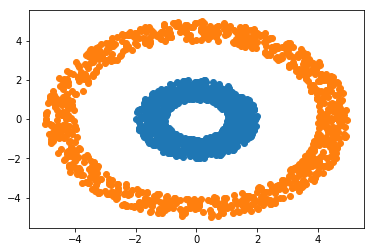

In [4]:
X1 = Distribution.radial_binary(pts=1000,
               mean=[0, 0],
               start=1,
               end=2)
X2 = Distribution.radial_binary(pts=1000,
               mean=[0, 0],
               start=4,
               end=5)


Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X2.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))


X = ch.stack([X1, X2])
binary_visualize(X)

In [5]:
ch.sign(ch.Tensor([1,2,-1]))


 1
 1
-1
[torch.FloatTensor of size 3]